# Введение #

В первых двух уроках мы научились строить полносвязные сети из стеков плотных слоев. При создании все веса сети инициализируются случайно — сеть пока ничего не «знает». В этом уроке мы увидим, как обучать нейронную сеть; мы посмотрим, как нейросети *учатся*.

Как и во всех задачах машинного обучения, мы начинаем с набора обучающих данных. Каждый пример в обучающих данных состоит из признаков (входов) и ожидаемой цели (выхода). Обучение сети означает настройку ее весов так, чтобы она могла преобразовывать признаки в цель. В наборе данных *80 Cereals*, например, нам нужна сеть, которая может по содержанию `'sugar'`, `'fiber'` и `'protein'` предсказать `'calories'` для каждого хлопья. Если мы успешно обучим сеть этому, ее веса должны в каком-то виде отражать связь между этими признаками и целью, выраженную в обучающих данных.

Помимо обучающих данных нам нужны еще две вещи:
- «Функция потерь», которая измеряет, насколько хороши предсказания сети.
- «Оптимизатор», который подсказывает сети, как менять веса.

# Функция потерь #

Мы уже видели, как спроектировать архитектуру сети, но еще не обсуждали, как сказать сети, *какую* задачу решать. Это задача функции потерь.

**Функция потерь** измеряет расхождение между истинным значением цели и значением, предсказанным моделью. 

Для разных задач подходят разные функции потерь. Мы рассматривали задачи **регрессии**, где нужно предсказать числовое значение — калории в *80 Cereals*, оценку в *Red Wine Quality*. Другие регрессионные задачи — прогноз цены дома или топливной эффективности автомобиля.

Распространенная функция потерь для регрессии — **средняя абсолютная ошибка** или **MAE**. Для каждого предсказания `y_pred` MAE измеряет расхождение с истинной целью `y_true` как абсолютную разницу `abs(y_true - y_pred)`.

Полная MAE-потеря на наборе данных — это среднее всех этих абсолютных разниц.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/VDcvkZN.png" width="500" alt="A graph depicting error bars from data points to the fitted line..">
<figcaption style="textalign: center; font-style: italic"><center>Средняя абсолютная ошибка — это средняя длина отрезков между аппроксимирующей кривой и точками данных.
</center></figcaption>
</figure>

Помимо MAE, в регрессионных задачах часто используют среднеквадратичную ошибку (MSE) или loss Хьюбера (оба доступны в Keras).

Во время обучения модель использует функцию потерь как ориентир для поиска правильных значений весов (меньшая потеря — лучше). Другими словами, функция потерь задает цель сети.

# Оптимизатор — стохастический градиентный спуск #

Мы описали задачу, которую должна решать сеть, но теперь нужно сказать, *как* ее решать. Это задача **оптимизатора**. Оптимизатор — это алгоритм, который изменяет веса, чтобы минимизировать потери.

Практически все алгоритмы оптимизации, используемые в глубоком обучении, относятся к семейству **стохастического градиентного спуска**. Это итеративные алгоритмы, которые обучают сеть шаг за шагом. Один **шаг** обучения выглядит так:
1. Берем часть обучающих данных и прогоняем через сеть, чтобы получить предсказания.
2. Измеряем потери между предсказаниями и истинными значениями.
3. Затем корректируем веса в направлении, которое уменьшает потери.

И так снова и снова, пока потери не станут настолько малыми, насколько нужно (или пока не перестанут уменьшаться).

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/rFI1tIk.gif" width="1600" alt="Fitting a line batch by batch. The loss decreases and the weights approach their true values.">
<figcaption style="textalign: center; font-style: italic"><center>Обучение нейронной сети с помощью стохастического градиентного спуска.
</center></figcaption>
</figure>

Каждая выборка обучающих данных на итерации называется **микропакетом** (или просто «batch»), а полный проход по всему набору данных — **эпохой**. Число эпох — это сколько раз сеть увидит каждый обучающий пример.

Анимация показывает, как линейная модель из Урока 1 обучается с помощью SGD. Бледно-красные точки — весь обучающий набор, а ярко-красные — минибатчи. Каждый раз, когда SGD видит новый минибатч, он сдвигает веса (`w` — наклон и `b` — пересечение с осью y) к их правильным значениям на этом батче. Батч за батчем прямая в итоге сходится к наилучшему приближению. Видно, что потери уменьшаются по мере того, как веса приближаются к истинным значениям.

## Скорость обучения и размер батча ##

Обратите внимание, что прямая смещается лишь немного в направлении каждого батча (вместо того чтобы сразу двигаться полностью). Размер этих сдвигов определяется **скоростью обучения**. Меньшая скорость обучения означает, что сети нужно увидеть больше минибатчей, прежде чем ее веса сойдутся к наилучшим значениям.

Скорость обучения и размер минибатчей — два параметра, которые сильнее всего влияют на то, как идет обучение SGD. Их взаимодействие часто тонкое, и правильный выбор этих параметров не всегда очевиден. (Мы изучим эти эффекты в упражнении.)

К счастью, для большинства задач не требуется длительный подбор гиперпараметров, чтобы получить удовлетворительные результаты. **Adam** — это алгоритм SGD с адаптивной скоростью обучения, поэтому он подходит для большинства задач без настройки параметров (в некотором смысле «самонастраивающийся»). Adam — отличный оптимизатор общего назначения.

## Добавление функции потерь и оптимизатора ##

После определения модели вы можете добавить функцию потерь и оптимизатор с помощью метода `compile` модели:

```
model.compile(
    optimizer="adam",
    loss="mae",
)
```

Обратите внимание: мы можем указать функцию потерь и оптимизатор просто строкой. Вы также можете обращаться к ним напрямую через API Keras — например, если хотите настроить параметры — но для нас значения по умолчанию вполне подходят.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
    <strong>Что в имени?</strong><br>
Градиент — это вектор, который указывает, в каком направлении должны изменяться веса. Точнее, он показывает, как нужно менять веса, чтобы потери менялись <em>быстрее всего</em>. Мы называем процесс градиентным <strong>спуском</strong>, потому что он использует градиент, чтобы <em>спускаться</em> по кривой потерь к минимуму. <strong>Стохастический</strong> означает «определяемый случаем». Наше обучение <em>стохастично</em>, потому что минибатчи — это <em>случайные выборки</em> из набора данных. Вот почему это называется SGD!
</blockquote>


# Пример — Red Wine Quality #

Теперь мы знаем все, что нужно, чтобы начать обучать модели глубокого обучения. Посмотрим это в действии! Мы будем использовать набор данных *Red Wine Quality*.

Этот набор данных состоит из физико-химических измерений примерно 1600 португальских красных вин. Также включена оценка качества каждого вина по результатам слепых дегустаций. Насколько хорошо мы можем предсказать субъективную оценку качества вина по этим измерениям?

Всю подготовку данных мы поместили в следующую скрытую ячейку. Она не критична для дальнейшего, поэтому можете ее пропустить. Одна вещь, на которую стоит обратить внимание: мы масштабировали каждый признак в интервал $[0, 1]$. Как мы подробнее обсудим в Уроке 5, нейросети обычно работают лучше, когда входы находятся в общем масштабе.


In [1]:

import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('../dataset/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


Сколько входов должна иметь эта сеть? Мы можем узнать это, посмотрев на число столбцов в матрице данных. Не забудьте не включать здесь целевую переменную (`'quality'`) — только входные признаки.


In [2]:
print(X_train.shape)

(1119, 11)


Одиннадцать столбцов означает одиннадцать входов.

Мы выбрали трехслойную сеть с более чем 1500 нейронами. Такая сеть должна уметь изучать достаточно сложные зависимости в данных.


In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

/Users/flexonafft/KaggleLearning/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/flexonafft/KaggleLearning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Выбор архитектуры модели должен быть частью процесса. Начинайте с простого и используйте валидационную потерю как ориентир. Подробнее о разработке моделей вы узнаете в упражнениях.

После определения модели мы компилируем ее с оптимизатором и функцией потерь.


In [4]:
model.compile(
    optimizer='adam',
    loss='mae',
)

Теперь мы готовы начать обучение! Мы сказали Keras подавать оптимизатору 256 строк обучающих данных за раз (это `batch_size`) и сделать это 10 раз, проходя весь набор данных (это `epochs`).


In [5]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3107 - val_loss: 0.1406
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1422 - val_loss: 0.1249
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1247 - val_loss: 0.1136
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1098 - val_loss: 0.1061
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1079 - val_loss: 0.1051
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1065 - val_loss: 0.1065
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1022 - val_loss: 0.1021
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1026 - val_loss: 0.1019
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0993 - val_loss: 0.1016
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0996 - val_loss: 0.0975


Вы увидите, что Keras будет обновлять информацию о потерях по мере обучения модели.

Однако зачастую лучше смотреть на график потерь. Метод `fit` сохраняет историю потерь во время обучения в объекте `History`. Мы преобразуем эти данные в DataFrame Pandas, что упрощает построение графика.


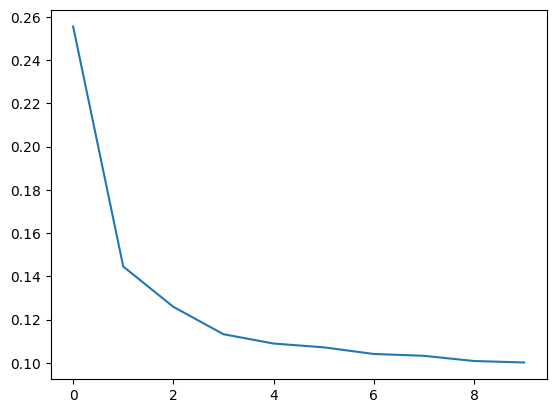

In [6]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

Обратите внимание, как потери выходят на плато по мере прохождения эпох. Когда кривая потерь становится горизонтальной, это означает, что модель научилась всему, чему может, и нет смысла продолжать обучение на дополнительных эпохах.


# Ваш ход #

Теперь [**используйте стохастический градиентный спуск**](https://www.kaggle.com/kernels/fork/11887330), чтобы обучить вашу сеть.


---




*Есть вопросы или комментарии? Посетите [форум обсуждений курса](https://www.kaggle.com/learn/intro-to-deep-learning/discussion), чтобы пообщаться с другими учащимися.*
